# Описание

- Задача: проанализировать стек технологий студентов, выявить аномалии, выявить существенные кластеры, подумать над оценкой компетенций студентов внутри кластеров
- Ожидаемый результат: выявление кластеров 
- Краткий вывод: требуется рассмотреть кластеры относительно желаемых ролей. 

# План исследования

1. Подготовка данных
2. Составление матрицы "Студенты-компетенции"
3. Кластеризация
4. 

# Подготовка данных

In [1]:
import pandas as pd
import re

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.decomposition import PCA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# df = pd.read_excel("Данные_для_генерации_распределений_студентов_по_проектам_IT_Клиника.xlsx")
df = pd.read_excel("raw_dataset_1.xlsx")
df.head()

,Отметка времени,"Единая учетная запись СПбГУ (например, ST000000)","Выберете интересующие Вас роли, в IT [Бизнес и системный анализ]","Выберете интересующие Вас роли, в IT [Дизайн UX / UI и проектирование интерфейсов]","Выберете интересующие Вас роли, в IT [Анализ и инженерия данных]","Выберете интересующие Вас роли, в IT [Backend - разработка]","Выберете интересующие Вас роли, в IT [Frontend - разработка]","Выберете интересующие Вас роли, в IT [Тестирование и обеспечение качества]","Выберете интересующие Вас роли, в IT [Развертывание и внедрение]","Выберете интересующие Вас роли, в IT [Управление командой / проектом]",...,SoftSkills [Коммуникации],SoftSkills [Работа в команде],SoftSkills [Наставничество],SoftSkills [Управление людьми],Какими еще навыками в области IT Вы обладаете? Оцените данные навыки,Оцените Ваш уровень мотивации [К работе над интересными проектами],Оцените Ваш уровень мотивации [Определить свой путь дальнейшего развития и развиваться в IT],Оцените Ваш уровень мотивации [Устроиться на интересную для себя работу],"Хотите ли Вы общаться с другими студентами и выпускниками, заинтересованными в развитии в области IT на базе СПбГУ на интересующие Вас темы?","Что Вам поможет развиваться быстрее в том направлении деятельности, которое Вы выбрали?"
0,2023-09-04 00:11:31.420,ST110863,Хочу поучаствовать в проекте в этой роли и раз...,Не интересно,Хочу поучаствовать в проекте в этой роли и раз...,"Интересно, можно попробовать","Интересно, можно попробовать","Интересно, можно попробовать",Не интересно,Хочу поучаствовать в проекте в этой роли и раз...,...,Отлично,Отлично,Нормально,Хорошо,NaN,4 - Готов выполнять задания на благо команды,5 - Готов сам стать мотиватором для других,5 - Готов сам стать мотиватором для других,Да,Практика
1,2023-09-04 00:17:43.746,ST115979,Не интересно,Хочу поучаствовать в проекте в этой роли и раз...,Не интересно,"Интересно, можно попробовать","Интересно, можно попробовать","Интересно, можно попробовать",Не интересно,"Интересно, можно попробовать",...,Хорошо,Хорошо,Хорошо,Нормально,NaN,4 - Готов выполнять задания на благо команды,4 - Готов выполнять задания на благо команды,4 - Готов выполнять задания на благо команды,Да,Советы опытных специалистов и чтение научных с...
2,2023-09-04 00:32:39.844,ST068863,"Интересно, можно попробовать",Не интересно,"Интересно, можно попробовать","Интересно, можно попробовать","Интересно, можно попробовать","Интересно, можно попробовать","Интересно, можно попробовать","Интересно, можно попробовать",...,Отлично,Хорошо,Отлично,Хорошо,NaN,4 - Готов выполнять задания на благо команды,4 - Готов выполнять задания на благо команды,5 - Готов сам стать мотиватором для других,Да,NaN
3,2023-09-04 00:35:23.178,ST106375,"Интересно, можно попробовать",Не интересно,Хочу поучаствовать в проекте в этой роли и раз...,Не интересно,Не интересно,Не интересно,Не интересно,Не интересно,...,Нормально,Хорошо,Ниже среднего,Ниже среднего,NaN,5 - Готов сам стать мотиватором для других,5 - Готов сам стать мотиватором для других,5 - Готов сам стать мотиватором для других,Да,У меня нет опыта но хочу работать в сфере ИТ п...
4,2023-09-04 00:51:36.202,ST068010,"Интересно, можно попробовать","Интересно, можно попробовать",Хочу поучаствовать в проекте в этой роли и раз...,Не интересно,Не интересно,"Интересно, можно попробовать",Не интересно,"Интересно, можно попробовать",...,Нормально,Нормально,Нормально,Нормально,NaN,"3 - Готов выполнять задания, но если в них виж...","3 - Готов выполнять задания, но если в них виж...",5 - Готов сам стать мотиватором для других,Да,NaN


In [7]:
tech_columns = [
    'Языки программирования (например: C++, Python, Java, etc)',
    'Библиотеки и фреймворки для различных направлений использования (например: Qt, Numpy, Weka, Angular, PyTorch, etc)',
    'Инструменты для проектирования, бизнес и системного анализа (например: BPMN, UML, Archimate, ARIS etc)',
    'Инструменты для разработки ПО - например: VS Code, PyCharm, Git, etc)',
    'Инструменты для тестирования  (например: GTests, Selenium, Gatling, pytest etc)',
    'Инструменты CI / CD (например: Jenkins, Travis CI, Docker, etc)',
    'Инструменты для управления проектами (например: Jira, Trello, MS Project, etc) '
]


In [8]:
new_df = df[['Единая учетная запись СПбГУ (например, ST000000)', 
'Какими еще знаниями Вы владеете, релевантными для IT-отрасли и в какой степени? Перечислите их и оцените', 
'Языки программирования (например: C++, Python, Java, etc)', 
'Библиотеки и фреймворки для различных направлений использования (например: Qt, Numpy, Weka, Angular, PyTorch, etc)', 
'Инструменты для проектирования, бизнес и системного анализа (например: BPMN, UML, Archimate, ARIS etc)', 
'Инструменты для разработки ПО - например: VS Code, PyCharm, Git, etc)', 
'Инструменты для тестирования  (например: GTests, Selenium, Gatling, pytest etc)', 
'Инструменты CI / CD (например: Jenkins, Travis CI, Docker, etc)',
'Инструменты для управления проектами (например: Jira, Trello, MS Project, etc) ']]


In [9]:
new_df = new_df.astype('str')

In [10]:
# new_df.set_index('Единая учетная запись СПбГУ (например, ST000000)', inplace=True)

Сделать в срезе по годам?

## Матрица студенты-компетенции

In [11]:
# список, в котором будут храниться все уникальные технологии из разных файлов
all_technologies = []

# Пройдемся по всем файлам и добавим уникальные технологии в список
file_paths = ["languages.txt", "frameworks.txt", "analysis_tools.txt", "CI_CD.txt", "dev_tools.txt",  "project_management_tools.txt"]
for file_path in file_paths:
    with open(file_path, "r") as file:
        technologies = file.read().splitlines()
        # print(technologies)
        all_technologies.extend(technologies)
    # print(len(all_technologies))

# Удалить дубликаты (и отсортировать список уникальных технологий)
all_technologies = list(set(all_technologies))
# all_technologies.sort()

In [12]:
print(len(all_technologies))

453


In [13]:
# Создать DataFrame с именами студентов в качестве индексов и названиями технологий в качестве столбцов
tech_df = pd.DataFrame(columns=all_technologies, index=range(len(new_df)))

In [14]:
# tech_df['st'] = new_df['Единая учетная запись СПбГУ (например, ST000000)']

In [15]:
# tech_df.set_index('st', inplace=True)

In [16]:
# Создать столбцы для каждой уникальной технологии и заполнить их нулями
for tech in all_technologies:
    tech_df[tech] = 0


In [17]:
tech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Columns: 453 entries, unreal engine to opencv
dtypes: int64(453)
memory usage: 1.2 MB


In [18]:
#  tech_df.head()

In [19]:
def fill_tech_df_with_values(tech_df, column_name: str):
    for i, response in new_df.iterrows():
        competence_values = {}  # Создать пустой словарь для хранения значений компетенций студента

        # Регулярное выражение для извлечения технологий и оценок
        pattern = r"([a-zA-Z\-\+ # .\d]+) - (\d)"  # r"\n?([a-zA-Z\-\+ # .]+) - \d" 
        
        # cleaned_response = response[column_name].replace('\n', ',')


        # response_lower = response.lower()
        response_lower = response[column_name].lower()
        cleaned_response = response_lower.replace('\n', ',')
        cleaned_response = cleaned_response.replace('с', 'c')
        cleaned_response = cleaned_response.replace('c ++', "c++")
        cleaned_response = cleaned_response.replace('pyhton', 'python')
        
        # Найти все совпадения в ответе студента
        matches = re.findall(pattern, cleaned_response)
        
        if matches:
            for match in matches:
                technology = match[0].strip().lower()
                rating = int(match[1])
                competence_values[technology] = rating
                # print(technology, rating)
            
            for tech in all_technologies:
                if tech_df.at[i, tech] == 0:
                    tech_df.at[i, tech] = competence_values.get(tech, 0)

# Применить функцию к каждому столбцу, содержащему данные о технологиях
for column in tech_columns:  # tech_columns - список названий столбцов с данными о технологиях
    fill_tech_df_with_values(tech_df, column)

In [20]:
tech_df.head(5)

,unreal engine,rollup,jsonsimlple,mongoose,itertools,microsoft todo,c#,elixir,rayon,pycharm,...,mokito,handlebars,nltk,wsl,beanie,google colab,redis,fltk,coroutines,opencv
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,5,0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,4,0,0,5,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,4,0,0,4,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,4,0,0,2,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(len(tech_df[tech_df['python']>0]))

279


In [22]:
# путь и имя файла Excel, в который запишем данные
excel_file = 'output.xlsx'

# Запись данных в Excel
tech_df.to_excel(excel_file)  # Установить index=False, чтобы не сохранять индексы

# Сбор статистики

In [23]:
statistics = tech_df.describe()
print(statistics['git'])

count    361.000000
mean       1.673130
std        1.617121
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: git, dtype: float64


In [24]:
def hist(column_name: str):
    column_data = tech_df[column_name]

    # Нарисуем гистограмму
    column_data.plot.hist(bins=10)
    plt.xlabel('Значения')
    plt.ylabel('Количество значений')
    plt.title(f'Гистограмма для {column_name}')
    plt.show()

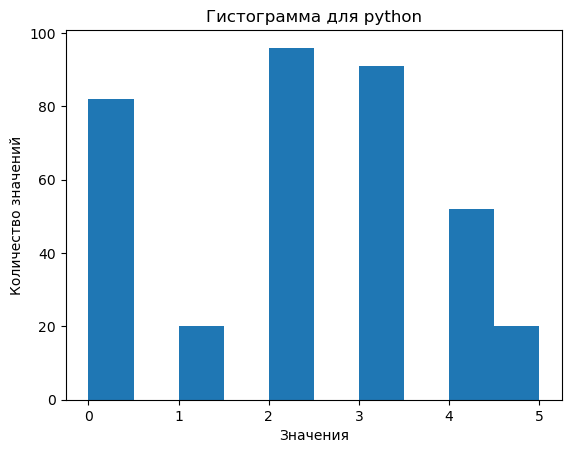

In [25]:
hist('python')

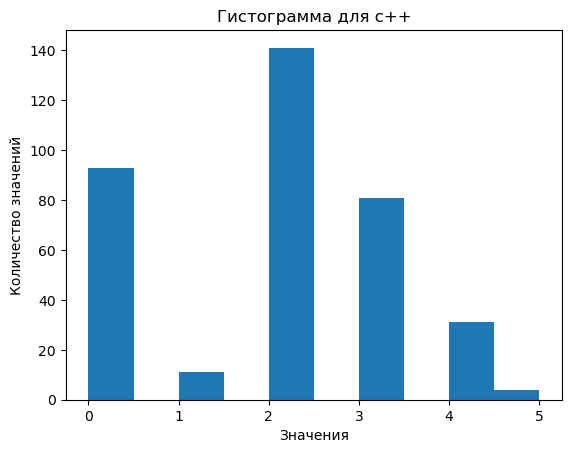

In [26]:
hist('c++')

# Обобщение значений по категориям

In [27]:
tech_df.head()

,unreal engine,rollup,jsonsimlple,mongoose,itertools,microsoft todo,c#,elixir,rayon,pycharm,...,mokito,handlebars,nltk,wsl,beanie,google colab,redis,fltk,coroutines,opencv
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,5,0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [28]:
def fill_categories(file_name):
    languages = []
    with open(file_name, "r") as file:
        language = file.read().splitlines()
        languages.extend(language)
    languages = list(set(languages))
    return languages

In [29]:
languages = fill_categories("languages.txt")
framework = fill_categories("frameworks.txt")
analysis_tool = fill_categories("analysis_tools.txt")
CI_CD = fill_categories("CI_CD.txt")
dev_tools = fill_categories("dev_tools.txt")
project_management_tools = fill_categories("project_management_tools.txt")

In [31]:
categories = ["language", "framework", "analysis_tool", "CI_CD", "dev_tools",  "project_management_tools"]

In [32]:

agr_data = pd.DataFrame(columns=categories, index=range(len(new_df)))
agr_data['st'] = new_df['Единая учетная запись СПбГУ (например, ST000000)']

In [33]:
for category in categories:
    agr_data[category] = 0

In [34]:
agr_data['language'] = tech_df[languages].sum(axis=1)
agr_data['framework'] = tech_df[framework].sum(axis=1)
agr_data['analysis_tool'] = tech_df[analysis_tool].sum(axis=1)
agr_data['CI_CD'] = tech_df[CI_CD].sum(axis=1)
agr_data['dev_tools'] = tech_df[dev_tools].sum(axis=1)
agr_data['project_management_tools'] = tech_df[project_management_tools].sum(axis=1)

In [35]:
agr_data.head()

,language,framework,analysis_tool,CI_CD,dev_tools,project_management_tools,st
0,6,5,1,0,5,0,ST110863
1,13,18,8,1,23,1,ST115979
2,8,15,0,4,8,4,ST068863
3,0,0,0,0,0,0,ST106375
4,7,18,0,2,14,0,ST068010


In [36]:
agr_data.set_index('st', inplace=True)

In [37]:
agr_data.head()

,language,framework,analysis_tool,CI_CD,dev_tools,project_management_tools
st,,,,,,
ST110863,6,5,1,0,5,0
ST115979,13,18,8,1,23,1
ST068863,8,15,0,4,8,4
ST106375,0,0,0,0,0,0
ST068010,7,18,0,2,14,0


In [38]:
agr_data1 = agr_data

### Кластеризация по категориям

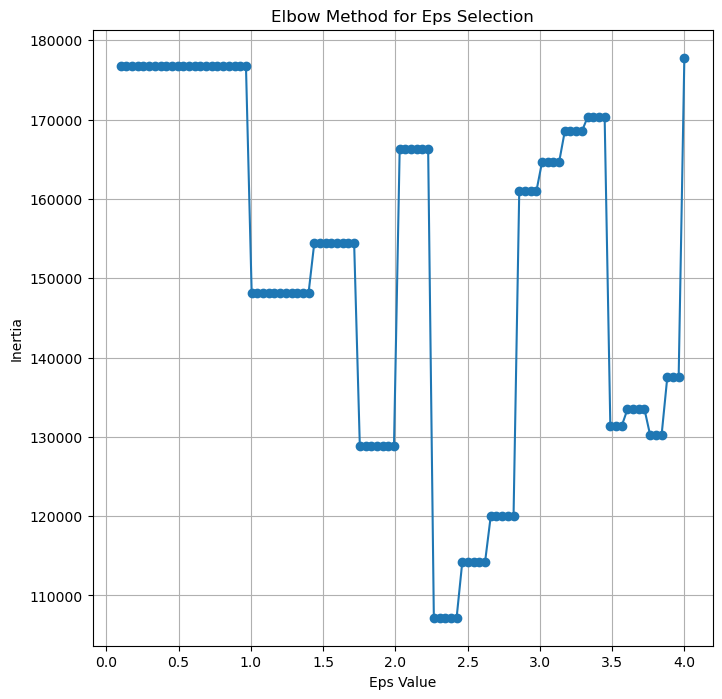

In [39]:
eps_values = np.linspace(0.1, 4.0, 100)

# Create a list to store inertia values
inertia_values = []

# Iterate over eps values and compute the inertia for each
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(agr_data)
    # Compute some metric for evaluating the quality of clustering (e.g., inertia)
    # In this example, I'll use the sum of squared distances from points to their cluster centers
    # Note: This is not an official DBSCAN metric, just for demonstration
    cluster_centers = np.array([np.mean(agr_data[cluster_labels == label], axis=0) for label in np.unique(cluster_labels)])
    distances = np.sum((agr_data - cluster_centers[cluster_labels]) ** 2, axis=1)
    inertia = np.sum(distances)
    inertia_values.append(inertia)

# Plot the elbow method graph
plt.figure(figsize=(8, 8))
plt.plot(eps_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Eps Value')
plt.ylabel('Inertia')
plt.title('Elbow Method for Eps Selection')
plt.grid(True)
plt.show()


In [40]:
# Создаем объект DBSCAN с параметрами
dbscan = DBSCAN(eps=2.5, min_samples=5)  # Подобрать значения параметров eps и min_samples под вашу задачу

# Обучим модель на данных
dbscan.fit(agr_data)

# Метки кластеров (набор целых чисел, -1 означает выбросы)
cluster_labels = dbscan.labels_

# Метка аномалий (True/False)
is_anomaly = cluster_labels == -1

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Количество кластеров:", n_clusters)

Количество кластеров: 3


In [41]:
# Используем словарь для подсчета количества точек в каждом кластере
cluster_counts = {}
for label in set(cluster_labels):
    if label == -1:
        continue  # Пропустить выбросы
    cluster_counts[label] = np.sum(cluster_labels == label)

# Выводим количество точек в каждом кластере
for label, count in cluster_counts.items():
    print(f"Кластер {label}: {count} точек")

Кластер 0: 151 точек
Кластер 1: 5 точек
Кластер 2: 13 точек


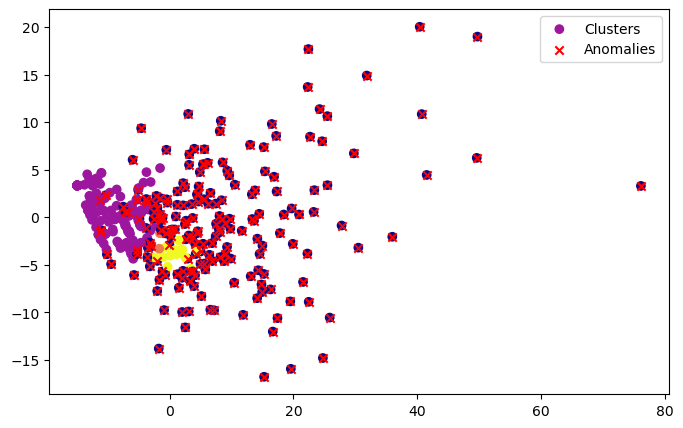

In [42]:
# Применяем PCA для уменьшения размерности до двух компонент
pca = PCA(n_components=2)
data_2d = pca.fit_transform(agr_data)

# Отображаем точки кластеров на графике
plt.figure(figsize=(8, 5))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_labels, cmap='plasma', label='Clusters')

# Отображаем аномальные точки на графике
plt.scatter(data_2d[is_anomaly][:, 0], data_2d[is_anomaly][:, 1], c='red', marker='x', label='Anomalies') 

plt.legend()
plt.show()


In [43]:
# Создать DataFrame из данных с метками кластеров
clustered_data = pd.DataFrame(agr_data, columns=categories)
clustered_data['Cluster'] = cluster_labels

In [44]:
# clustered_data - это DataFrame с данными, 'Cluster' - это название колонки с метками кластеров

# Подсчитать количество элементов в каждом кластере
cluster_counts = clustered_data['Cluster'].value_counts()

# Отфильтровать только кластеры, в которых количество элементов больше или равно 5
valid_clusters = cluster_counts[cluster_counts >= 5].index

# Создать новый DataFrame только с данными из выбранных кластеров
filtered_clustered_data = clustered_data[clustered_data['Cluster'].isin(valid_clusters)]


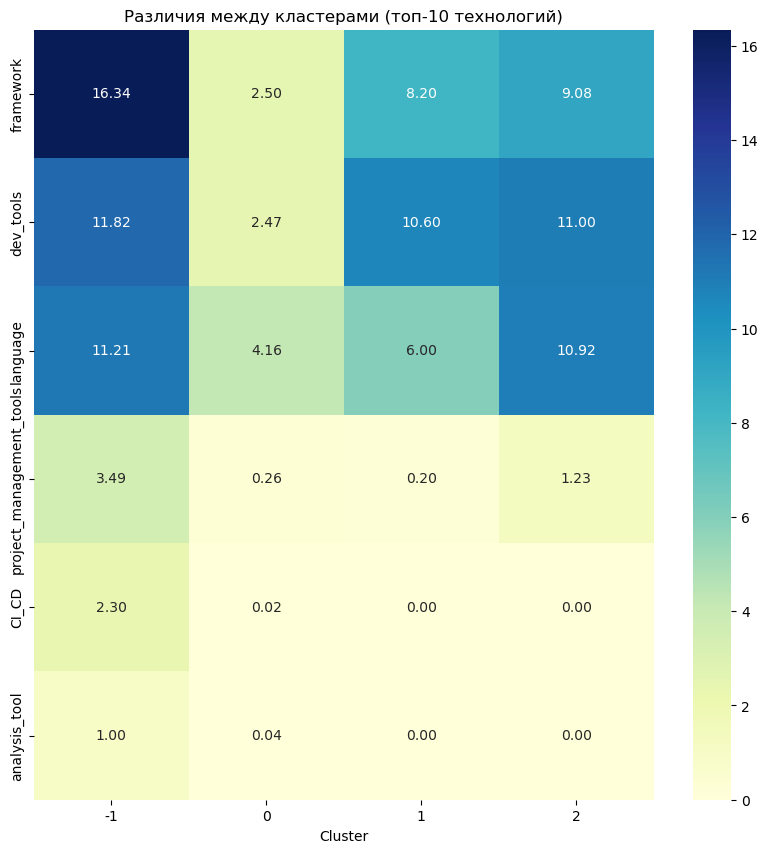

In [45]:
# Вычислить средние значения для каждого кластера
cluster_means = filtered_clustered_data.groupby('Cluster'). mean()  # sum()  # median() 

# Выбрать топ-10 технологий с наибольшими средними значениями
top_10_technologies = cluster_means.max().sort_values(ascending=False).index[:50]

# Фильтрация данных по выбранным топ-10 технологиям
cluster_means_filtered = cluster_means[top_10_technologies]

# Создать тепловую карту различий
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_means_filtered.T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Различия между кластерами (топ-10 технологий)')
plt.show()

# Кластеризация и выявление аномалий

### DBSCAN для кластеризации и выявления аномалий

In [46]:
data = tech_df.values
data1 = tech_df.values

### метод локтя

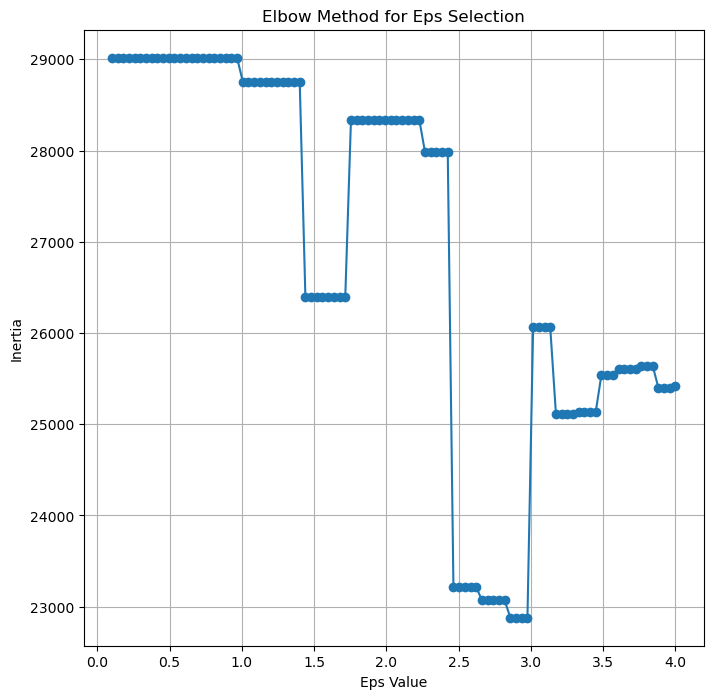

In [47]:
# Create a list of eps values to test
eps_values = np.linspace(0.1, 4.0, 100)

# Create a list to store inertia values
inertia_values = []

# Iterate over eps values and compute the inertia for each
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(data)
    # Compute some metric for evaluating the quality of clustering (e.g., inertia)
    # In this example, I'll use the sum of squared distances from points to their cluster centers
    # Note: This is not an official DBSCAN metric, just for demonstration
    cluster_centers = np.array([np.mean(data[cluster_labels == label], axis=0) for label in np.unique(cluster_labels)])
    distances = np.sum((data - cluster_centers[cluster_labels]) ** 2, axis=1)
    inertia = np.sum(distances)
    inertia_values.append(inertia)

# Plot the elbow method graph
plt.figure(figsize=(8, 8))
plt.plot(eps_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Eps Value')
plt.ylabel('Inertia')
plt.title('Elbow Method for Eps Selection')
plt.grid(True)
plt.show()



### Метод локтя с индексом силуэта

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
# # Создаем список значений eps для тестирования
# eps_values = np.linspace(0.1, 5.0, 500)

# # Создаем список для хранения значений Silhouette Score
# silhouette_scores = []

# for eps in eps_values:
#     dbscan = DBSCAN(eps=eps, min_samples=3)
#     cluster_labels = dbscan.fit_predict(data)
    
#     # Вычисляем Silhouette Score
#     if len(set(cluster_labels)) > 1:  # Silhouette Score требует более одного кластера
#         score = silhouette_score(data, cluster_labels)
#         silhouette_scores.append(score)
#     else:
#         silhouette_scores.append(0)  # Если только один кластер, Silhouette Score равен 0

# # Plot the elbow method graph using Silhouette Score
# plt.figure(figsize=(8, 8))
# plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
# plt.xlabel('Eps Value')
# plt.ylabel('Average Silhouette Score')
# plt.title('Elbow Method for Eps Selection (using Silhouette Score)')
# plt.grid(True)
# plt.show()


In [50]:
# # Генерируем искусственные данные для демонстрации
# np.random.seed(0)
# data = np.random.randn(300, 2)

# # Создаем список значений eps для тестирования
# eps_values = np.linspace(0.1, 1.0, 100)

# # Создаем список для хранения значений Silhouette Score
# silhouette_scores = []

# for eps in eps_values:
#     dbscan = DBSCAN(eps=eps, min_samples=5)
#     cluster_labels = dbscan.fit_predict(data)
    
#     # Вычисляем Silhouette Score
#     if len(set(cluster_labels)) > 1:  # Silhouette Score требует более одного кластера
#         score = silhouette_score(data, cluster_labels)
#         silhouette_scores.append(score)
#     else:
#         silhouette_scores.append(0)  # Если только один кластер, Silhouette Score равен 0

# # Plot the Silhouette Score graph
# plt.figure(figsize=(8, 8))
# plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
# plt.xlabel('Eps Value')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs. Eps Value for DBSCAN')
# plt.grid(True)
# plt.show()


1.45, 3 - 4 кластера
eps=2.95, min_samples=5 - 2 кластера

In [94]:
dbscan = DBSCAN(eps=1.45, min_samples=3)

dbscan.fit(data)

DBSCAN(eps=1.45, min_samples=3)

In [95]:
# Метки кластеров (набор целых чисел, -1 означает выбросы)
cluster_labels = dbscan.labels_

# Метка аномалий (True/False)
is_anomaly = cluster_labels == -1


In [96]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Количество кластеров:", n_clusters)

Количество кластеров: 4


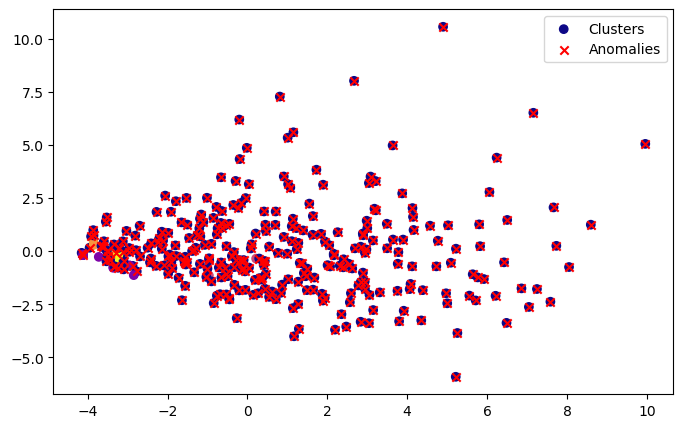

In [98]:
# Применяем PCA для уменьшения размерности до двух компонент
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Отображаем точки кластеров на графике
plt.figure(figsize=(8, 5))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_labels, cmap='plasma', label='Clusters')

# Отображаем аномальные точки на графике
plt.scatter(data_2d[is_anomaly][:, 0], data_2d[is_anomaly][:, 1], c='red', marker='x', label='Anomalies') 

plt.legend()
plt.show()


# Оценка компетенций внутри кластеров

In [100]:
# Используем словарь для подсчета количества точек в каждом кластере
cluster_counts = {}
for label in set(cluster_labels):
    if label == -1:
        continue  # Пропустить выбросы
    cluster_counts[label] = np.sum(cluster_labels == label)

# Выводим количество точек в каждом кластере
for label, count in cluster_counts.items():
    print(f"Кластер {label}: {count} точек")

Кластер 0: 49 точек
Кластер 1: 4 точек
Кластер 2: 6 точек
Кластер 3: 3 точек


In [104]:
def analyze_clusters(data, cluster_labels, all_technologies):
    # Создаем DataFrame из исходных данных
    df = pd.DataFrame(data=data, columns=all_technologies)
    
    # Определим уникальные метки кластеров
    unique_clusters = np.unique(cluster_labels)
    
    for cluster_index in unique_clusters:
        if cluster_index == -1:
            continue  # Пропустить выбросы
        # Индексы точек, принадлежащих кластеру cluster_index
        cluster_indices = np.where(cluster_labels == cluster_index)[0]
        
        # Создаем DataFrame для данных в текущем кластере
        cluster_df = df.iloc[cluster_indices]
        
        # Вычисляем максимальные значения по каждой колонке (по столбцам)
        max_values = cluster_df.max()

        mean_values = cluster_df.mean(axis=1)  # среднее mean_values
        max_sums = cluster_df.max(axis=1) # максимальные суммы max_sums

        
        # Получаем индексы 10 наибольших максимальных значений
        top_10_indices = max_values.argsort()[-10:]
        
        # Извлекаем названия колонок, соответствующие этим индексам
        top_10_columns = cluster_df.columns[top_10_indices]
        
        # Выводим информацию о кластере и его топ-10 колонках
        print(f"Кластер {cluster_index}:")
        print(f"Топ-10 колонок с наибольшими максимальными значениями:")
        print(top_10_columns)
        print()

# # Пример использования функции
# data = ...  # исходные данные (матрица данных)
# cluster_labels = ...  # Метки кластеров, полученные после кластеризации
# all_technologies = ...  # Названия всех колонок

analyze_clusters(data1, cluster_labels, all_technologies)


Кластер 0:
Топ-10 колонок с наибольшими максимальными значениями:
Index(['opencv', 'junit', 'go', 'nginx', 'anaconda jupyter notebook', 'pandas',
       'c++', 'matplotlib', 'python', 'numpy'],
      dtype='object')

Кластер 1:
Топ-10 колонок с наибольшими максимальными значениями:
Index(['react devtools', 'anaconda jupyter notebook', 'junit', 'java',
       'pycharm', 'numpy', 'python', 'git', 'c++', 'vs code'],
      dtype='object')

Кластер 2:
Топ-10 колонок с наибольшими максимальными значениями:
Index(['anaconda', 'draw.io', 'krl', 'go', 'opencv', 'spring', 'jira',
       'python', 'java', 'c++'],
      dtype='object')

Кластер 3:
Топ-10 колонок с наибольшими максимальными значениями:
Index(['podman', 'docker', 'renpy', 'anaconda', 'draw.io', 'solidity',
       'opencv', 'git', 'python', 'c++'],
      dtype='object')



#### не подобрала параметры для DBSCAN, количество аномалий больше, чем размер любого найденного кластера

In [105]:
# DataFrame из данных с метками кластеров
clustered_data = pd.DataFrame(agr_data, columns=categories)
clustered_data['Cluster'] = cluster_labels

In [106]:
clustered_data = pd.DataFrame(data, columns=all_technologies)
clustered_data['Cluster'] = cluster_labels

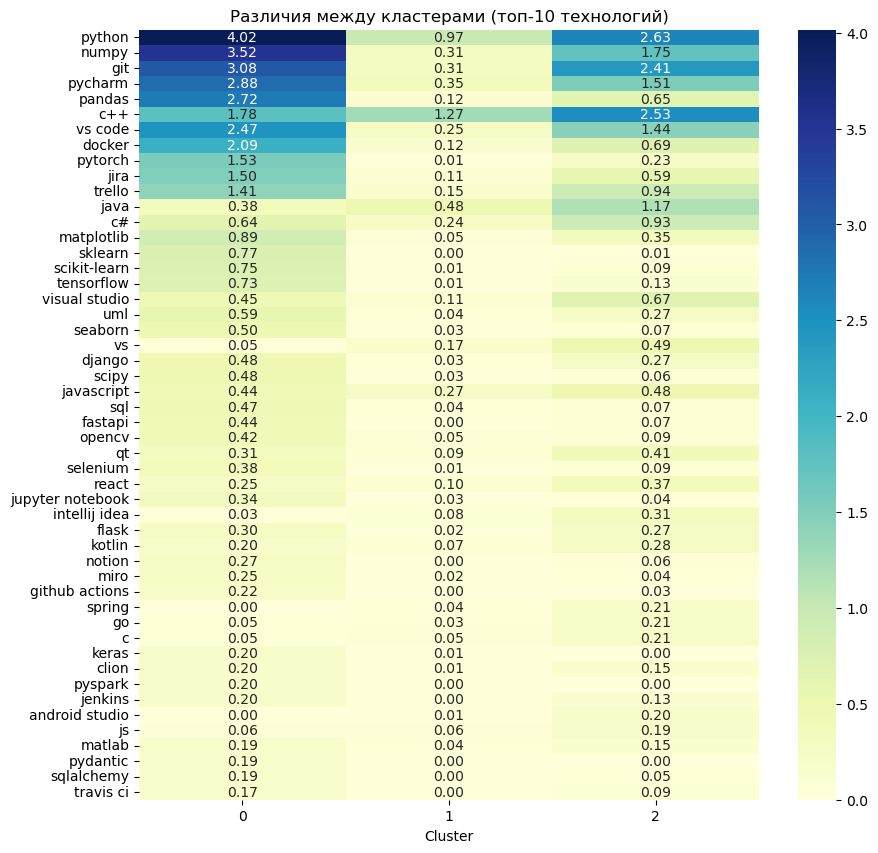

In [108]:

# Вычислить средние значения для каждого кластера
cluster_means = filtered_clustered_data.groupby('Cluster'). mean()  # sum()  # median() 

# Выбрать топ-10 технологий с наибольшими средними значениями
top_10_technologies = cluster_means.max().sort_values(ascending=False).index[:50]

# Отфильтровать данные по выбранным топ-10 технологиям
cluster_means_filtered = cluster_means[top_10_technologies]

# Создать тепловую карту различий
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_means_filtered.T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Различия между кластерами (топ-10 технологий)')
plt.show()

# K-means

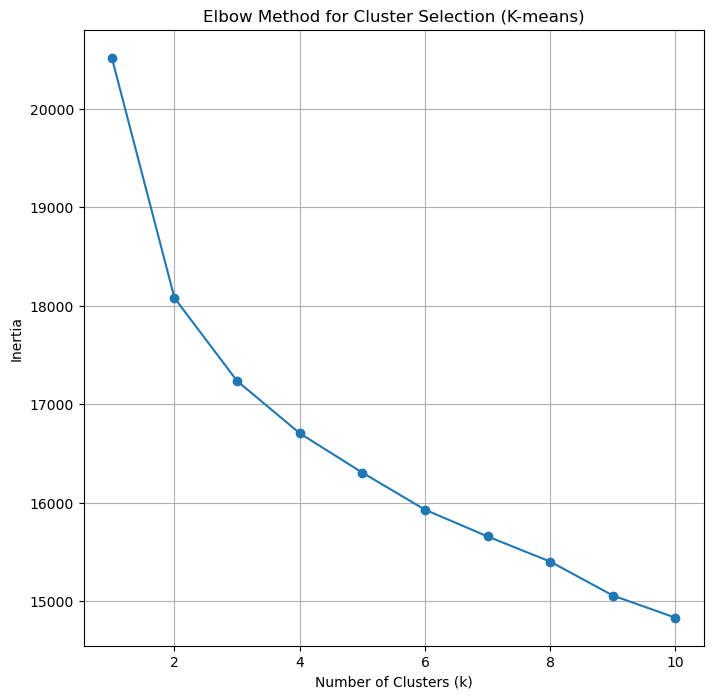

In [109]:
# Create a list of k values to test
k_values = range(1, 11)  # Test k from 1 to 10

# Create a list to store inertia values
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(data)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Plot the elbow method graph
plt.figure(figsize=(8, 8))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Cluster Selection (K-means)')
plt.grid(True)
plt.show()


In [110]:
# Создаем объект KMeans с заданным количеством кластеров (k)
k = 3 # Заменить на желаемое количество кластеров
kmeans = KMeans(n_clusters=k, random_state=7)

# Обучаем модель на данных
kmeans.fit(data)

# Получаем метки кластеров для каждой точки
cluster_labels = kmeans.labels_

# # Отображаем точки кластеров на графике
# plt.figure(figsize=(8, 5))
# plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='plasma', label='Clusters')

# plt.legend()
# plt.show()


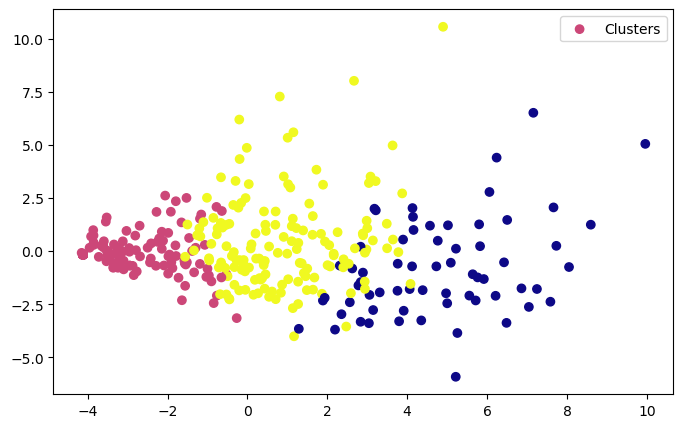

In [111]:
# Применяем PCA для уменьшения размерности до двух компонент
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Отображаем точки кластеров на графике
plt.figure(figsize=(8, 5))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_labels, cmap='plasma', label='Clusters')

# Отображаем аномальные точки на графике
#plt.scatter(data_2d[is_anomaly][:, 0], data_2d[is_anomaly][:, 1], c='red',  label='Anomalies') # marker='x',

plt.legend()
plt.show()

In [112]:
# Используем словарь для подсчета количества точек в каждом кластере
cluster_counts = {}
for label in set(cluster_labels):
    if label == -1:
        continue  # Пропустить выбросы
    cluster_counts[label] = np.sum(cluster_labels == label)

# Выводим количество точек в каждом кластере
for label, count in cluster_counts.items():
    print(f"Кластер {label}: {count} точек")

Кластер 0: 64 точек
Кластер 1: 147 точек
Кластер 2: 150 точек


In [113]:
analyze_clusters(data, cluster_labels, all_technologies)

Кластер 0:
Топ-10 колонок с наибольшими максимальными значениями:
Index(['selenium', 'asana', 'lxml', 'pandas', 'wandb', 'clion', 'flask',
       'trello', 'sas enterprise', 'docker'],
      dtype='object')

Кластер 1:
Топ-10 колонок с наибольшими максимальными значениями:
Index(['assembler', 'javascript', 'ruby on rails', 'go', 'ruby', 'kotlin',
       'java spring', 'c++', 'python', 'unreal engine'],
      dtype='object')

Кластер 2:
Топ-10 колонок с наибольшими максимальными значениями:
Index(['gitlab ci', 'jetbrains', 'vs code', 'visual studio', 'scala', 'c++',
       'youtrack', 'recyclerview', 'docker', 'python'],
      dtype='object')



# Визуализация и интерпретация результатов

In [114]:
# data - это массив с данными, cluster_labels - массив с метками кластеров, all_technologies - список названий колонок

# Создать DataFrame из данных с метками кластеров
clustered_data = pd.DataFrame(data, columns=all_technologies)
clustered_data['Cluster'] = cluster_labels


In [115]:
# clustered_data - это DataFrame с данными, 'Cluster' - это название колонки с метками кластеров

# Подсчитать количество элементов в каждом кластере
cluster_counts = clustered_data['Cluster'].value_counts()

# Отфильтровать только кластеры, в которых количество элементов больше или равно 5
valid_clusters = cluster_counts[cluster_counts >= 5].index

# Создать новый DataFrame только с данными из выбранных кластеров
filtered_clustered_data = clustered_data[clustered_data['Cluster'].isin(valid_clusters)]


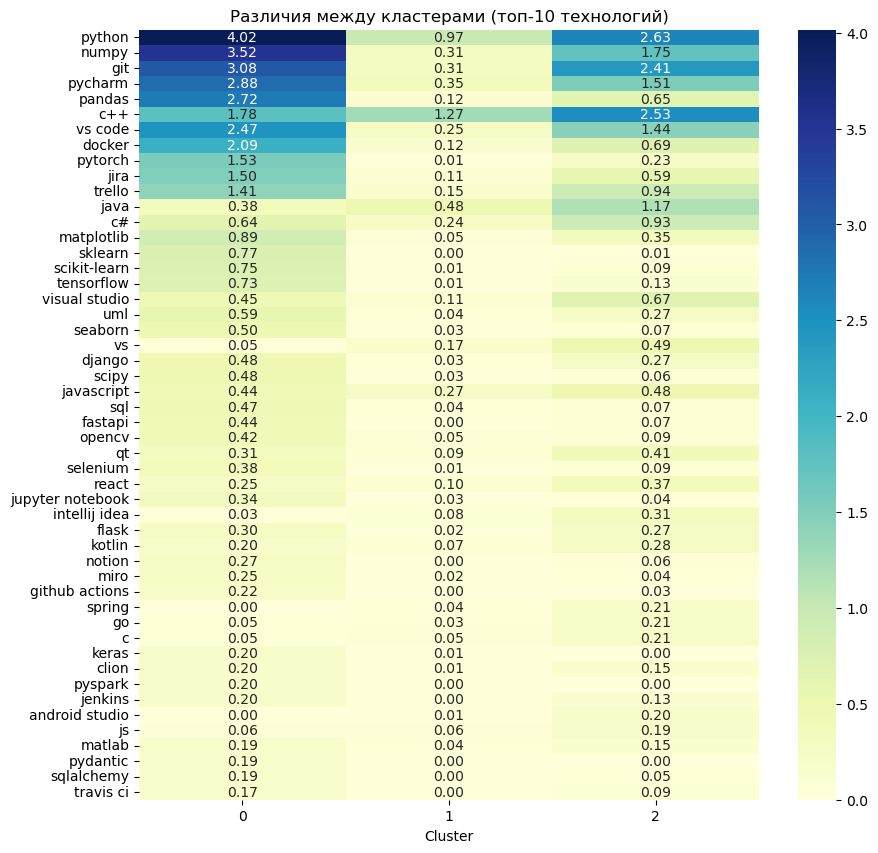

In [116]:
# Вычислить средние значения для каждого кластера
cluster_means = filtered_clustered_data.groupby('Cluster'). mean()  # sum()  # median() 

# Выбрать топ-10 технологий с наибольшими средними значениями
top_10_technologies = cluster_means.max().sort_values(ascending=False).index[:50]

# Отфильтровать данные по выбранным топ-10 технологиям
cluster_means_filtered = cluster_means[top_10_technologies]

# Создать тепловую карту различий
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_means_filtered.T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Различия между кластерами (топ-10 технологий)')
plt.show()


## Обнаружение аномалий

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances

In [118]:
# Получите центроиды кластеров
cluster_centers = kmeans.cluster_centers_

# Вычислите расстояния между точками и центроидами кластеров (расстояние Евклида)
distances = euclidean_distances(data, cluster_centers)

# Выберите пороговое значение для аномалий, например, среднее расстояние плюс несколько стандартных отклонений
threshold = distances.mean() + 2 * distances.std()

# Найдите индексы точек, которые находятся далеко от центров кластеров
anomalies_indices = np.where(distances.min(axis=1) > threshold)

# Получите аномальные точки
anomalies = data[anomalies_indices]

# anomalies содержит аномальные точки


In [119]:

# # data - ваши данные
# # anomalies - аномальные точки
# # kmeans - обученная модель K-средних

# # Получите центроиды кластеров
# cluster_centers = kmeans.cluster_centers_

# # Вычислите расстояния между точками и центроидами кластеров (расстояние Евклида)
# distances = euclidean_distances(data, cluster_centers)

# # Выберите пороговое значение для аномалий
# threshold = distances.mean() + 2 * distances.std()

# # Найдите индексы аномальных точек
# anomalies_indices = np.where(distances.min(axis=1) > threshold)

# # Получите аномальные точки
# anomalies = data[anomalies_indices]

# # Отображаем точки данных на графике
# plt.figure(figsize=(8, 8))
# plt.scatter(data[:, 0], data[:, 1], c='b', label='Data Points')

# # Отображаем аномальные точки на графике
# plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', label='Anomalies')

# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend()
# plt.show()


# UMAP

In [121]:
# import umap
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # data - ваши данные
# n_clusters = 5  # Укажите желаемое количество кластеров

# # Преобразуйте данные с помощью UMAP
# umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
# umap_data = umap_model.fit_transform(data1)

# # Кластеризуйте данные с использованием K-средних
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# cluster_labels = kmeans.fit_predict(umap_data)

# # Отобразите результаты на графике
# plt.figure(figsize=(8, 8))
# plt.scatter(umap_data[:, 0], umap_data[:, 1], c=cluster_labels, cmap='viridis')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.title('UMAP Clustering')
# plt.show()


# Автоэнкодер

Обучить автоэнкодер, взять поэлементную сумму для каждого сжатого вектора // норму вектора, 

автоэнкодер с детекцией аномалий?

- Данных мало - обучить автоэнкодер нельзя

# Deep TDA

# Выводы

Матрица слишком разряженная 

Хочется фиксированное количество категорий для стабильности модели. В дальнейщем будем добавлять новые технологии, модель может стать не стабильной

isolation forest для детекции аномалий

Надо посмотреть статистики и все. 